In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data for observed score (X), true score (T), and error score (E)
data = np.array([
    [5, 5, 0],
    [3, 4, -1],
    [4, 3, 1],
    [3, 2, 1],
    [1, 1, 0],
    [5, 5, 0],
    [5, 4, 1],
    [2, 3, -1],
    [1, 2, -1],
    [1, 1, 0]
])

# Calculate means (M_X, M_T, M_E)
means = np.mean(data, axis=0)

# Calculate variances (Var(X), Var(T), Var(E))
variances = np.var(data, axis=0, ddof=0)


In [3]:
# Calculate reliability
reliability = variances[1] / (variances[1] + variances[2])


In [4]:
# Calculate the correlation between the observed score and the true score
r_xt = np.sqrt(reliability)


In [5]:
def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]
    r = df_corr.values[np.triu_indices(N, k = 1)].sum() / (N * (N - 1) / 2)

    cronbach_alpha = (N * r) / (1 + (N - 1) * r)

    return cronbach_alpha


In [6]:
# Define k (number of standard deviations for control limits)
k = 3

# Example data for p-chart (number of negative responses and sample sizes)
D = np.array([5, 2, 1, 3, 4, 2, 6, 1, 3])  # Number of respondents with negative answers in each sample
n = np.array([100, 80, 90, 110, 100, 120, 80, 95, 105])  


# Calculate proportions for each sample (p-chart)
p = D / n

# Calculate the center line (average proportion), UCL, and LCL for p-chart
p_bar = np.mean(p)
UCL_p = p_bar + k * np.sqrt(p_bar * (1 - p_bar) / n.mean())
LCL_p = p_bar - k * np.sqrt(p_bar * (1 - p_bar) / n.mean())



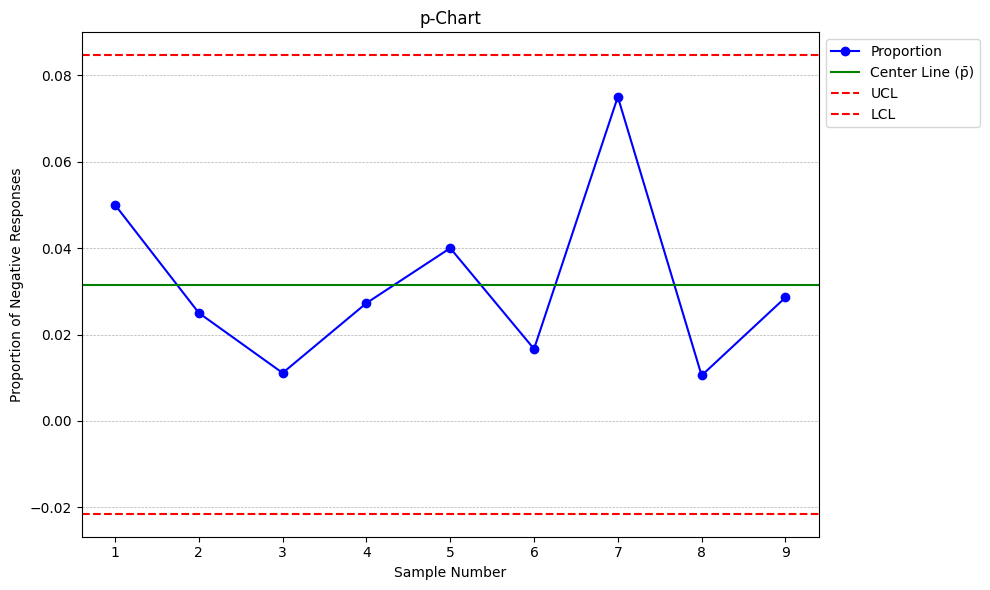

In [11]:
# Creating the p-chart using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(p, marker='o', linestyle='-', color='blue', label='Proportion')
plt.axhline(y=p_bar, color='green', linestyle='-', label='Center Line (p̄)')
plt.axhline(y=UCL_p, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_p, color='red', linestyle='--', label='LCL')
plt.title('p-Chart')
plt.xlabel('Sample Number')
plt.ylabel('Proportion of Negative Responses')
plt.xticks(np.arange(len(p)), np.arange(1, len(p) + 1))  # Adjust x-axis ticks to match sample numbers
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


In [8]:
# Example data for c-chart (number of negative responses per sample)
c = np.array([10, 12, 14, 13, 9, 11, 15, 8, 10])

# Calculate the center line (average of negative responses), UCL, and LCL for c-chart
c_bar = np.mean(c)
UCL_c = c_bar + k * np.sqrt(c_bar)
LCL_c = c_bar - k * np.sqrt(c_bar)

# Check for negative LCL and set it to zero if it is negative (since we cannot have negative counts)
LCL_c = max(LCL_c, 0)


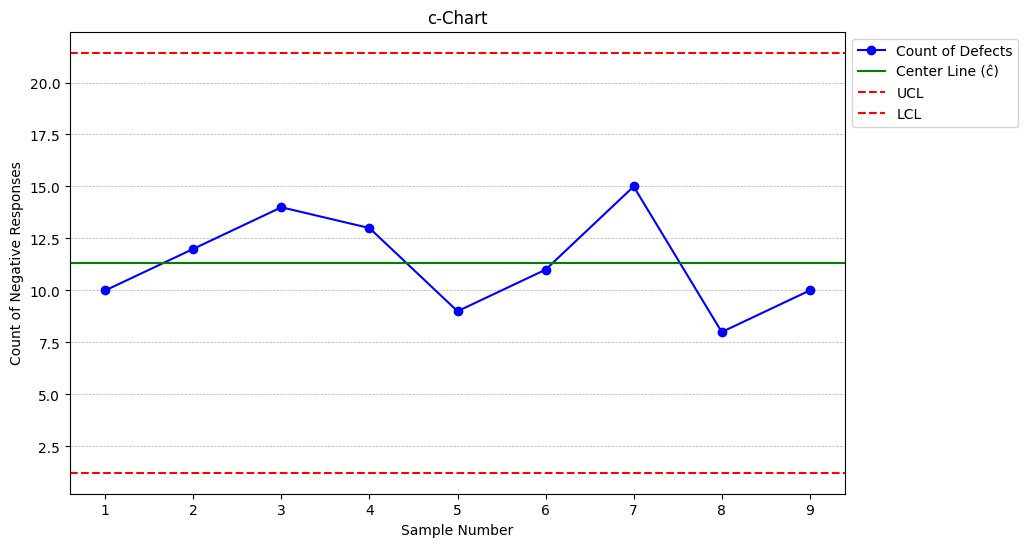

In [12]:
# Creating the c-chart using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(c, marker='o', linestyle='-', color='blue', label='Count of Defects')
plt.axhline(y=c_bar, color='green', linestyle='-', label='Center Line (ĉ)')
plt.axhline(y=UCL_c, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_c, color='red', linestyle='--', label='LCL')
plt.title('c-Chart')
plt.xlabel('Sample Number')
plt.ylabel('Count of Negative Responses')
plt.xticks(np.arange(len(c)), np.arange(1, len(c) + 1))  # Adjust x-axis ticks to match sample numbers
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.show()